### Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

from collections import Counter

#### Dataset 1

In [2]:
plr_injuries_df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\injuries.csv")

Here’s a polished and well-structured dataset description for your Jupyter Notebook:

---

## **Dataset Description**

This dataset provides information about athlete injuries and the corresponding dates of injury occurrences.

### **Columns Overview**
1. **athlete_id** (`integer`):  
   - A unique identifier for each athlete.  
   - Range: 1 to 30.  
   
2. **date** (`string`):  
   - The date when the injury was recorded, formatted as `YYYY-MM-DD`.  
   - Example: `2016-05-11`.  

---

### **Dataset Summary**
- **Total Records:** 137  
- **Unique Athletes:** 30  
- **Unique Dates:** 126  
- **Most Frequent Injury Date:** `2016-05-16` (4 occurrences)  


### **Potential Use Cases**
- Analysis of injury patterns over time for athletes.  
- Identifying high-risk periods for injuries.  
- Exploring the frequency of injuries for individual athletes.

---

In [3]:
plr_injuries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   athlete_id  137 non-null    int64 
 1   date        137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [4]:
plr_injuries_df.describe()

,athlete_id
count,137.000000
mean,15.605839
std,9.653068
min,1.000000
25%,6.000000
50%,18.000000
75%,24.000000
max,30.000000


#### Data Cleaning

In [5]:
# Convert the 'date' column to datetime format
plr_injuries_df['date'] = pd.to_datetime(plr_injuries_df['date'], errors='coerce')

In [6]:
# Check for duplicate rows
duplicates = plr_injuries_df.duplicated().sum()
duplicates

np.int64(0)

In [7]:
# Remove duplicate rows if any
data_cleaned = plr_injuries_df.drop_duplicates()

In [8]:
 data_cleaned.head()


,athlete_id,date
0,1,2016-05-11
1,1,2016-05-16
2,1,2016-07-28
3,1,2016-11-11
4,1,2016-12-16


In [9]:
injury_counts = data_cleaned.groupby("athlete_id").count().reset_index()

In [10]:

injury_counts = injury_counts.rename(columns={'date': 'total_injuries'})

In [11]:
injury_counts.sort_values(by="total_injuries", ascending=False, inplace=True)

In [12]:
injury_counts.head()

,athlete_id,total_injuries
0,1,12
23,25,12
20,22,10
2,3,9
1,2,7


#### Top 5 Athletes by Total Injuries


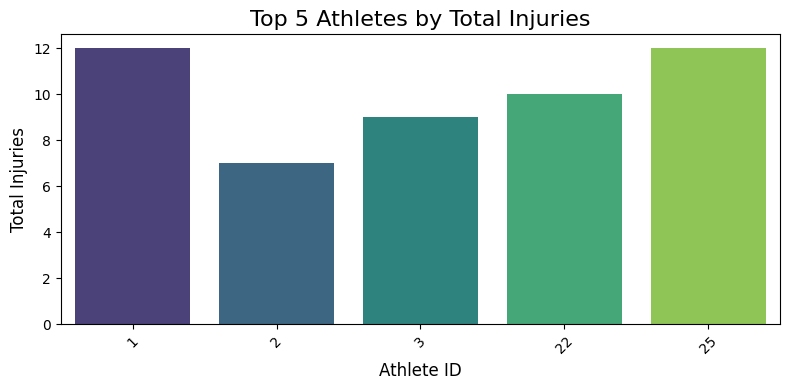

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='athlete_id', 
    y='total_injuries', 
    data=injury_counts.head(5), # Top 10 athletes
    palette="viridis"
)
plt.title("Top 5 Athletes by Total Injuries", fontsize=16)
plt.xlabel("Athlete ID", fontsize=12)
plt.ylabel("Total Injuries", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** The bar plot highlights the top 5 athletes with the highest total number of injuries. The x-axis represents athlete IDs, while the y-axis shows the total number of injuries for each athlete. The bars are color-coded using the "viridis" palette, and the athlete IDs are displayed on the x-axis with a 45-degree rotation for better readability.

**Conclusion:** The plot provides a clear view of which athletes are more prone to injuries. This information can be useful for further investigation into the causes of these injuries, whether they are related to the athlete's playing style, training routines, or other factors. Identifying athletes with frequent injuries might also help in implementing tailored recovery programs or preventive measures.

#### Yearly Trend of Injuries

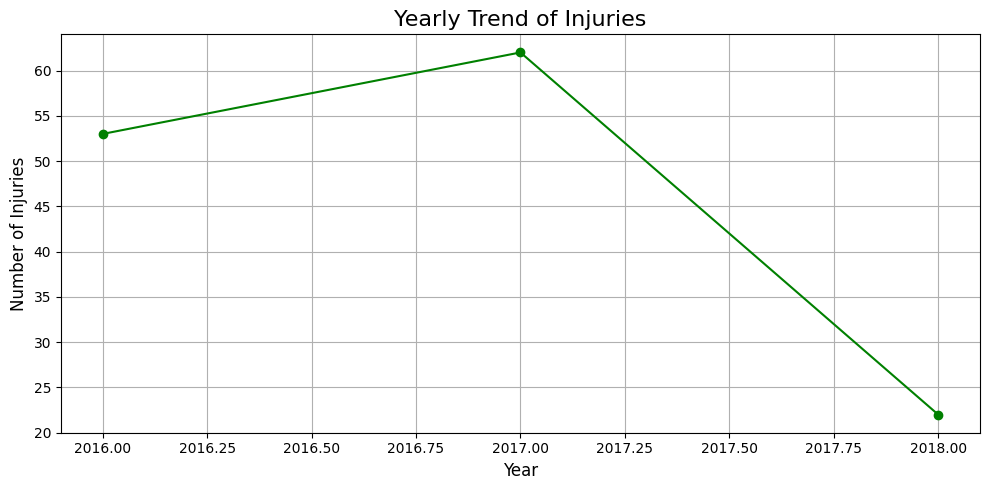

In [14]:
data_cleaned['year'] = data_cleaned['date'].dt.year
yearly_injuries = data_cleaned.groupby('year').size().reset_index(name='injuries')

plt.figure(figsize=(10, 5))
plt.plot(yearly_injuries['year'], yearly_injuries['injuries'], marker='o', color='green')
plt.title("Yearly Trend of Injuries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Injuries", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation:** The line plot shows the trend of injuries over the years. The x-axis represents the years, while the y-axis displays the number of injuries recorded each year. Data points are marked with circles, and the line provides a clear visual of injury fluctuations across time. The grid helps in visually tracking the changes.

**Conclusion:** This plot reveals how the number of injuries has varied over the years. Identifying upward or downward trends in injuries over time can guide further analysis into the causes or preventive measures. A consistent increase in injuries might suggest areas to investigate, such as training practices, player fatigue, or other influencing factors. Conversely, a decrease could indicate successful injury prevention strategies or changes in team management.

#### Dataset 2

In [15]:
df=pd.read_csv( "C:\\Users\\DELL8\\OneDrive\\Desktop\\player_stats.csv")



## **Dataset Description: Player Match Statistics**

This dataset contains detailed player performance information across various matches. It can be used to analyze player involvement, substitutions, disciplinary actions, and whether the player was part of the home team.

---

### **Column Descriptions**

1. **player_id (`object`)**:  
   - Unique identifier for each player.  
   - Total unique players: 4,992.  

2. **match_id (`integer`)**:  
   - Unique identifier for each match.  
   - Range: 1 to 66,601.  

3. **is_in_starting_11 (`integer`)**:  
   - Indicates whether the player was part of the starting lineup (1 for yes, 0 for no).  
   - Average participation as a starter: 71%.  

4. **substitution_on (`object`)**:  
   - The minute when the player was substituted onto the field, or "Null" if they were never substituted on.  

5. **substitution_off (`object`)**:  
   - The minute when the player was substituted off the field, or "Null" if they were never substituted off.  

6. **yellow_card (`object`)**:  
   - Indicates whether the player received a yellow card.  
   - Values: "True" (received), "Null" (not received).  

7. **red_card (`object`)**:  
   - Indicates whether the player received a red card.  
   - Values: "True" (received), "Null" (not received).  

8. **is_home_side (`integer`)**:  
   - Indicates if the player was part of the home team (1 for yes, 0 for no).  

---

### **Dataset Summary**
- **Total Records:** 356,465  
- **Unique Players:** 4,992  
- **Unique Matches:** 66,601  
- **Most Frequent Substitution On/Off Minute:** "Null" (no substitution)  
- **Yellow Cards:** Most players did not receive yellow cards (321,323 records as "Null").  
- **Red Cards:** Very few records indicate red card occurrences.  
- **Home vs Away Matches:** Balanced, with 50% being home matches.

---


### **Potential Use Cases**
- Analyzing player participation trends.  
- Studying substitution patterns.  
- Assessing player discipline through yellow and red cards.  
- Evaluating home and away team performances.


In [16]:
df.head()

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,Null,Null,Null,Null,0
1,p1,12,1,Null,Null,Null,Null,1
2,p1,24,1,Null,Null,Null,Null,1
3,p1,41,1,Null,Null,Null,Null,0
4,p1,46,1,Null,83',True,Null,0


In [17]:
df.isna().sum()

player_id            0
match_id             0
is_in_starting_11    0
substitution_on      0
substitution_off     0
yellow_card          0
red_card             0
is_home_side         0
dtype: int64

In [18]:
df.describe()

,match_id,is_in_starting_11,is_home_side
count,356465.000000,356465.000000,356465.000000
mean,13094.649615,0.710202,0.500086
std,17047.732712,0.453669,0.500001
min,1.000000,0.000000,0.000000
25%,3531.000000,0.000000,0.000000
50%,6616.000000,1.000000,1.000000
75%,12221.000000,1.000000,1.000000
max,66601.000000,1.000000,1.000000


#### Data cleaning

In [19]:
df.replace("Null", np.nan, inplace=True)


In [20]:
df['yellow_card'] = df['yellow_card'].notna()
df['red_card'] = df['red_card'].notna()

In [21]:
def extract_minutes(value):
    if pd.isna(value):
        return np.nan
    match = re.match(r"(\d+)", value)  
    return float(match.group(1)) if match else np.nan


In [22]:
df['substitution_on'] = df['substitution_on'].apply(extract_minutes)
df['substitution_off'] = df['substitution_off'].apply(extract_minutes)

In [23]:

data_cleaned = df.drop_duplicates()


In [24]:
data_cleaned['player_id'] = data_cleaned['player_id'].astype('category')

In [25]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356465 entries, 0 to 356464
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   player_id          356465 non-null  category
 1   match_id           356465 non-null  int64   
 2   is_in_starting_11  356465 non-null  int64   
 3   substitution_on    52852 non-null   float64 
 4   substitution_off   52887 non-null   float64 
 5   yellow_card        356465 non-null  bool    
 6   red_card           356465 non-null  bool    
 7   is_home_side       356465 non-null  int64   
dtypes: bool(2), category(1), float64(2), int64(3)
memory usage: 15.1 MB
None


In [26]:
print(data_cleaned.head())

  player_id  match_id  is_in_starting_11  substitution_on  substitution_off  \
0        p1         4                  1              NaN               NaN   
1        p1        12                  1              NaN               NaN   
2        p1        24                  1              NaN               NaN   
3        p1        41                  1              NaN               NaN   
4        p1        46                  1              NaN              83.0   

   yellow_card  red_card  is_home_side  
0        False     False             0  
1        False     False             1  
2        False     False             1  
3        False     False             0  
4         True     False             0  


In [27]:
data_cleaned

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,NaN,NaN,False,False,0
1,p1,12,1,NaN,NaN,False,False,1
2,p1,24,1,NaN,NaN,False,False,1
3,p1,41,1,NaN,NaN,False,False,0
4,p1,46,1,NaN,83.0,True,False,0
...,...,...,...,...,...,...,...,...
356460,p999,7462,0,70.0,NaN,False,False,1
356461,p999,7493,0,86.0,NaN,True,False,1
356462,p999,7549,0,NaN,NaN,False,False,1
356463,p999,7577,0,NaN,NaN,False,False,0


In [28]:

data_cleaned['substitution_on'].fillna(data_cleaned['substitution_on'].mean(), inplace=True)


data_cleaned['substitution_off'].fillna(data_cleaned['substitution_off'].median(), inplace=True)


In [29]:
data_cleaned

,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side
0,p1,4,1,69.074983,72.0,False,False,0
1,p1,12,1,69.074983,72.0,False,False,1
2,p1,24,1,69.074983,72.0,False,False,1
3,p1,41,1,69.074983,72.0,False,False,0
4,p1,46,1,69.074983,83.0,True,False,0
...,...,...,...,...,...,...,...,...
356460,p999,7462,0,70.000000,72.0,False,False,1
356461,p999,7493,0,86.000000,72.0,True,False,1
356462,p999,7549,0,69.074983,72.0,False,False,1
356463,p999,7577,0,69.074983,72.0,False,False,0


In [30]:
print(data_cleaned.duplicated().sum()) 

0


In [31]:
df.describe()

,match_id,is_in_starting_11,substitution_on,substitution_off,is_home_side
count,356465.000000,356465.000000,52852.000000,52887.000000,356465.000000
mean,13094.649615,0.710202,69.074983,69.086486,0.500086
std,17047.732712,0.453669,15.969170,15.971740,0.500001
min,1.000000,0.000000,2.000000,2.000000,0.000000
25%,3531.000000,0.000000,61.000000,61.000000,0.000000
50%,6616.000000,1.000000,72.000000,72.000000,1.000000
75%,12221.000000,1.000000,81.000000,81.000000,1.000000
max,66601.000000,1.000000,90.000000,90.000000,1.000000


#### Correlation Heatmap

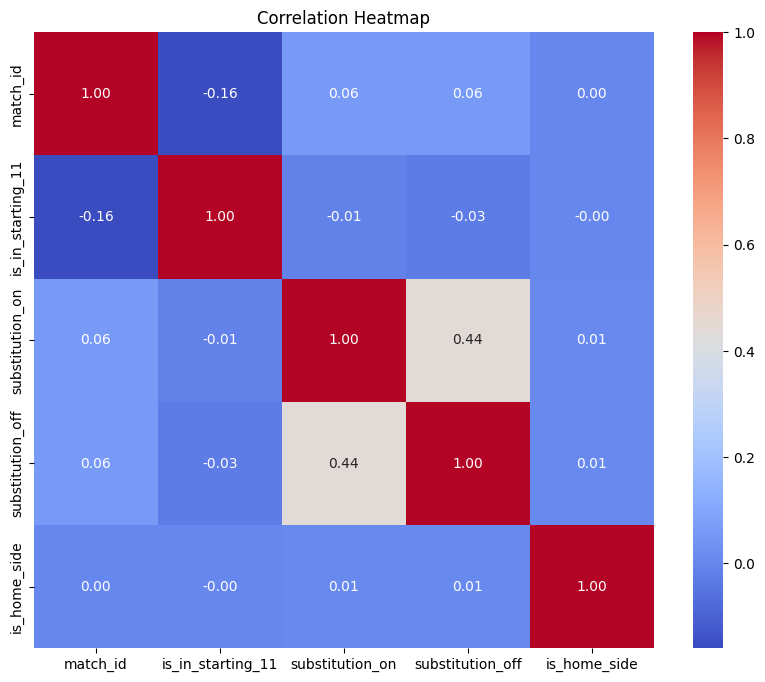

In [32]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observation:** The heatmap visualizes the correlation between numeric variables in the dataset, displaying values that indicate how strongly variables are related to each other. The color intensity represents the strength of the correlation, with darker colors indicating stronger correlations. The numbers within the cells show the actual correlation coefficients.

**Conclusion:** This correlation heatmap is a useful tool for identifying relationships between numeric variables, which could inform feature selection for machine learning models. Strong correlations between certain features may suggest redundancy, while weaker correlations could indicate more independent variables. Understanding these relationships helps in refining the model and preventing issues like multicollinearity, ensuring better predictive performance.

#### Encoding Categorical Data 

In [33]:
def encode_categorical(df):

    for col in df.select_dtypes(include=['object', 'category']):
        df[col] = df[col].astype('category').cat.codes
    return df

df=pd.read_csv( "C:\\Users\\DELL8\\OneDrive\\Desktop\\player_stats.csv")

# Encode categorical columns
encoded_df = encode_categorical(df)

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_df.head())


Encoded DataFrame:
   player_id  match_id  is_in_starting_11  substitution_on  substitution_off  \
0          0         4                  1              109               109   
1          0        12                  1              109               109   
2          0        24                  1              109               109   
3          0        41                  1              109               109   
4          0        46                  1              109                88   

   yellow_card  red_card  is_home_side  
0            0         0             0  
1            0         0             1  
2            0         0             1  
3            0         0             0  
4            1         0             0  


**Observation:** The function `encode_categorical()` converts categorical columns in the dataset into numeric codes, making them ready for machine learning models that require numerical inputs. After applying this function, the categorical values in columns like player names, positions, or other non-numeric features are now represented by integer codes.

**Conclusion:** Encoding categorical variables is a crucial preprocessing step before using the data in machine learning models. By converting categorical data into numerical form, the dataset becomes suitable for algorithms that can’t process non-numeric data directly. This step helps ensure that the dataset is ready for model training and analysis, enabling more accurate predictions and insights.

#### Distribution of Starting Players (is_in_starting_11)

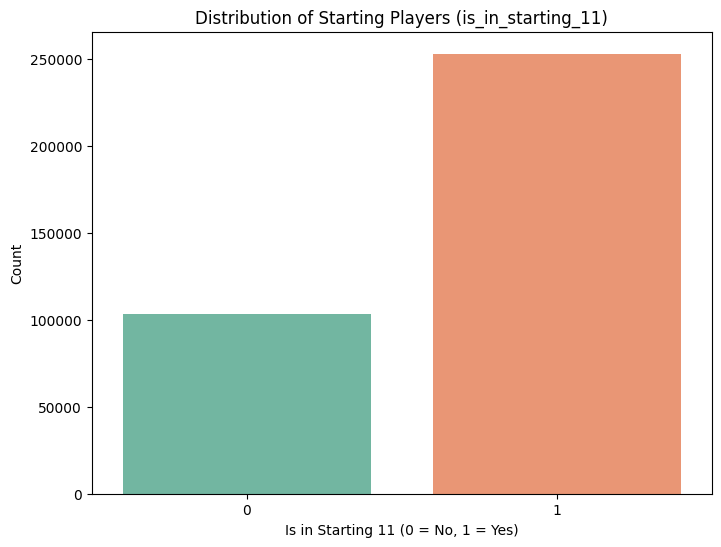

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_in_starting_11', palette='Set2')
plt.title("Distribution of Starting Players (is_in_starting_11)")
plt.xlabel("Is in Starting 11 (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**Observation:** The count plot visualizes the distribution of players in the starting lineup, with two categories: players who are in the starting 11 (represented by 1) and those who are not (represented by 0). The chart shows the frequency of each category, indicating how many players are typically in the starting lineup versus those who are not.

**Conclusion:** This plot highlights the overall participation rate of players in the starting 11. Understanding this distribution can help identify player rotation patterns or strategies used by coaches. Further analysis could assess how this affects player performance or injury rates, particularly if there are correlations between starting lineups and the frequency of injuries.

#### Percentage of Home vs. Away Matche

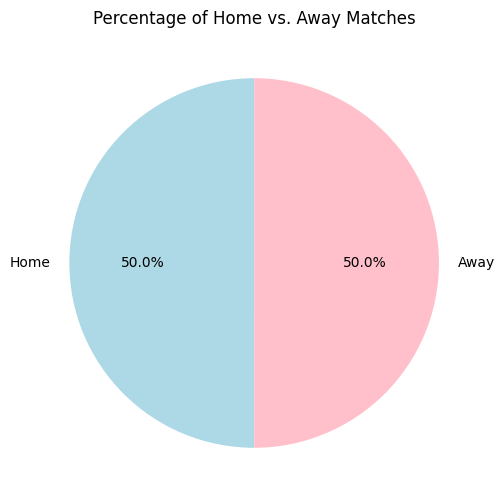

In [35]:
plt.figure(figsize=(8, 6))
home_away_counts = df['is_home_side'].value_counts()
labels = ['Home', 'Away']
plt.pie(home_away_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Percentage of Home vs. Away Matches")
plt.show()

**Observation:** The pie chart illustrates the proportion of home versus away matches in the dataset. The chart shows the percentage of games played at home compared to those played away, with clear visual representation of how these match locations are distributed.

**Conclusion:** The chart provides insight into the distribution of matches between home and away games, which could be useful for analyzing factors like home-field advantage or player performance in different environments. Further analysis could explore whether these match types correlate with injury rates, player performance, or other factors.

### Merging Player Injury Data and player_stats

In [36]:

plr_injuries_df.rename(columns={'athlete_id': 'player_id'}, inplace=True)
df["player_id"] =df["player_id"].astype(str)
plr_injuries_df["player_id"] = plr_injuries_df["player_id"].astype(str)

combined_data = pd.merge(df, plr_injuries_df, on="player_id", how="inner")

# Display the first few rows of the combined dataset to verify
combined_data.head()


,player_id,match_id,is_in_starting_11,substitution_on,substitution_off,yellow_card,red_card,is_home_side,date
0,1,9630,1,109,109,0,0,0,2016-05-11
1,1,9630,1,109,109,0,0,0,2016-05-16
2,1,9630,1,109,109,0,0,0,2016-07-28
3,1,9630,1,109,109,0,0,0,2016-11-11
4,1,9630,1,109,109,0,0,0,2016-12-16


In [37]:

unique_player_stats_ids = df["player_id"].unique()
unique_injuries_ids =  plr_injuries_df["player_id"].unique()


unique_player_stats_ids[:10], unique_injuries_ids[:10]  #


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype=object))

In [38]:
print(combined_data.columns)


Index(['player_id', 'match_id', 'is_in_starting_11', 'substitution_on',
       'substitution_off', 'yellow_card', 'red_card', 'is_home_side', 'date'],
      dtype='object')


#### Frequency of Injuries Over Time

In [39]:

injury_counts = combined_data['date'].value_counts().sort_index()
print(injury_counts)


date
2016-05-04     62
2016-05-11    148
2016-05-14      2
2016-05-16    334
2016-05-23     21
             ... 
2018-03-30      2
2018-04-02     98
2018-04-25     12
2018-04-27     76
2018-04-30      2
Name: count, Length: 126, dtype: int64


#### Injuries Over Time

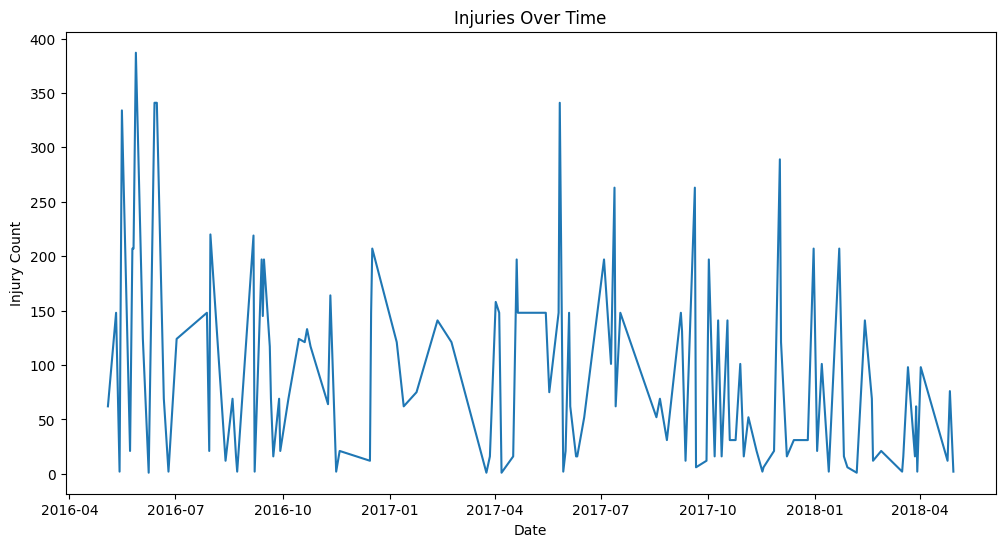

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=injury_counts)
plt.title("Injuries Over Time")
plt.xlabel("Date")
plt.ylabel("Injury Count")
plt.show()


**Observation:** The line plot visualizes the trend of injuries over time, showing how the injury count fluctuates across different dates. It allows for easy identification of periods with a higher or lower incidence of injuries, helping to discern any patterns or trends over the timeline.

**Conclusion:** By analyzing the injury trend over time, teams and management can identify peak injury periods and assess potential causes, such as intense match schedules, seasonal effects, or other factors. Understanding these trends can inform strategies for injury prevention, such as adjusting training intensity or optimizing player recovery during high-risk periods.

#### Top 10 Players with Most Injuries

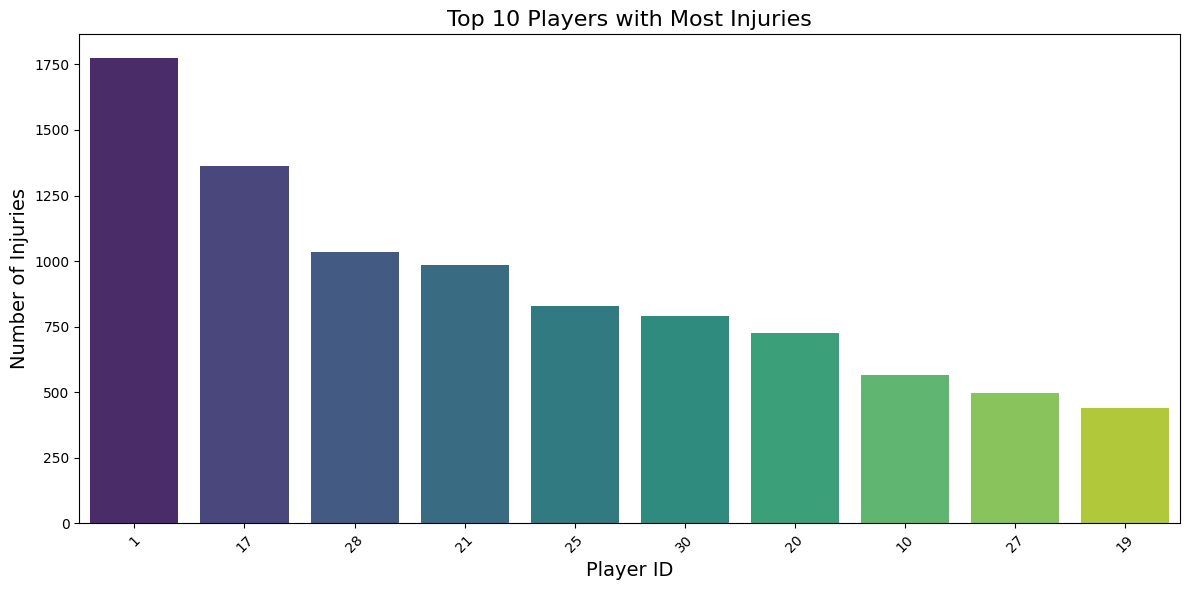

In [41]:

player_injury_counts = combined_data['player_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=player_injury_counts.index, y=player_injury_counts.values, palette='viridis')
plt.title("Top 10 Players with Most Injuries", fontsize=16)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:** The bar chart showcases the top 10 players with the most injuries, with each player’s injury count represented by the height of the corresponding bar. The chart reveals the players most affected by injuries, which could point to specific individuals who may require extra attention in terms of recovery or injury prevention.

**Conclusion:** Identifying players with the highest injury counts can help teams tailor specific health and fitness strategies to reduce their risk. It may also indicate whether certain players are more prone to injuries due to factors such as playing style, position, or physical condition. Further analysis could focus on identifying common factors among these players to prevent future injuries.

 #### Injury Distribution by Month

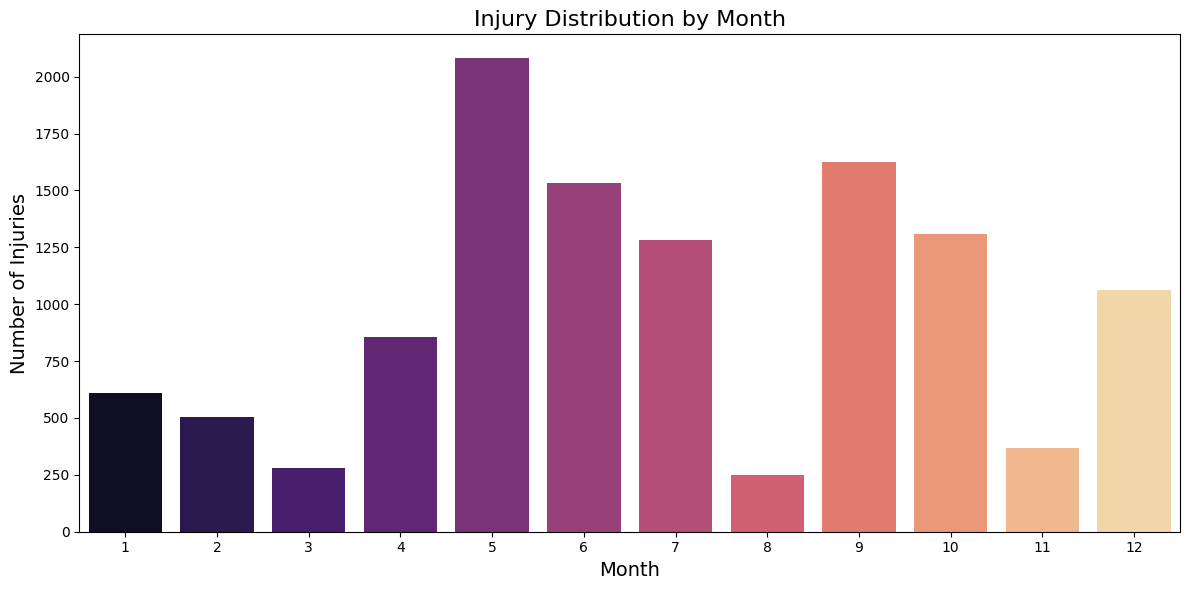

In [42]:
combined_data['month'] = combined_data['date'].dt.month
monthly_injury_counts = combined_data['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_injury_counts.index, y=monthly_injury_counts.values, palette='magma')
plt.title("Injury Distribution by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.tight_layout()
plt.show()


**Observation:**
The bar chart displays the distribution of injuries by month, with each bar representing the number of injuries recorded for that particular month. The chart reveals fluctuations in injury counts across the months, suggesting certain periods of the year may have higher injury occurrences than others.

**Conclusion:**
The analysis indicates that injury rates may vary seasonally or due to other factors such as match intensity, weather conditions, or player fatigue. Further exploration could identify specific months with unusually high injury rates, allowing teams to focus on prevention strategies during those times. Additionally, examining correlations with match schedules or training loads could provide further insights.

#### Home vs. Away Injuries

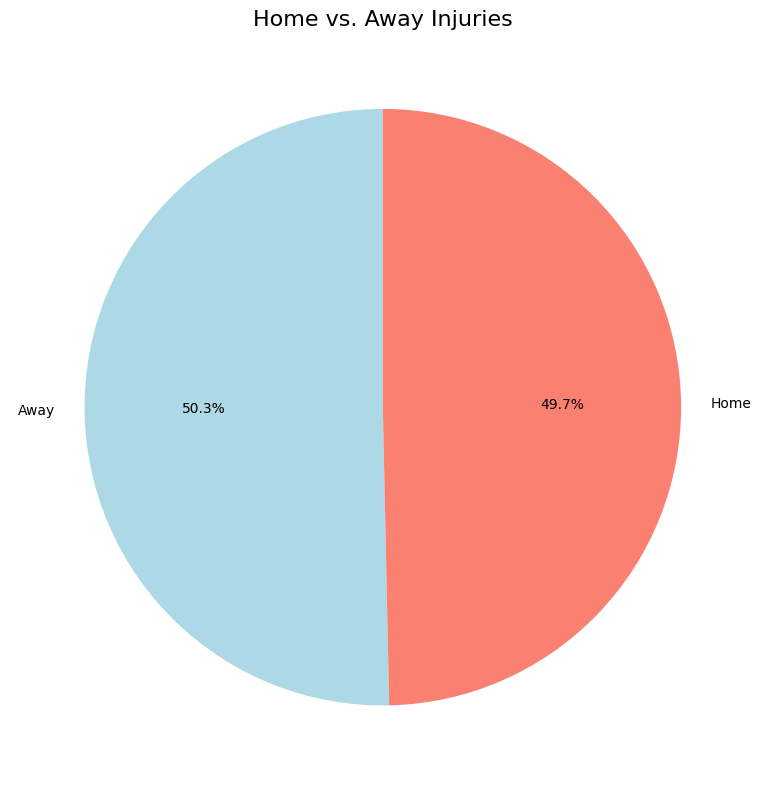

In [43]:
home_away_counts = combined_data['is_home_side'].value_counts()

plt.figure(figsize=(8, 8))
home_away_counts.plot(kind='pie', labels=['Away', 'Home'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Home vs. Away Injuries", fontsize=16)
plt.ylabel("")  # Hides the y-axis label
plt.tight_layout()
plt.show()


##### Observation:
The pie chart shows the distribution of injuries between home and away matches. The chart reveals the percentage of injuries occurring in each location, with a visual comparison of how the occurrences are divided. The differences in the proportions of injuries between home and away matches suggest there may be a location-based factor influencing injury frequency.

##### Conclusion: 
The distribution of injuries between home and away matches could indicate that external factors such as travel, crowd pressure, or environmental conditions might affect injury rates. Further analysis could explore whether this trend holds across different teams, player types, or match conditions to provide deeper insights into how location impacts player injuries.

In [44]:
print(combined_data.columns)


Index(['player_id', 'match_id', 'is_in_starting_11', 'substitution_on',
       'substitution_off', 'yellow_card', 'red_card', 'is_home_side', 'date',
       'month'],
      dtype='object')


#### Player Participation Before and After Injuries

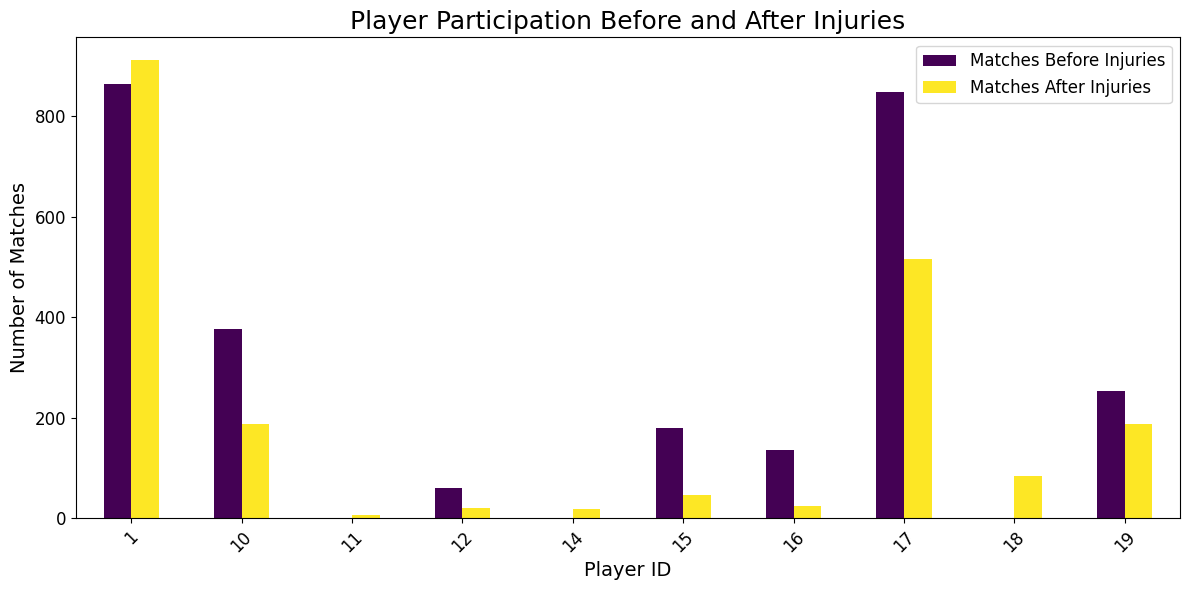

In [45]:

participation_before = combined_data[combined_data['is_in_starting_11'] == 1].groupby('player_id').size()
participation_after = combined_data[combined_data['is_in_starting_11'] == 0].groupby('player_id').size()

# Prepare data
impact_data = pd.DataFrame({
    'Matches Before Injuries': participation_before,
    'Matches After Injuries': participation_after
}).fillna(0).head(10)


# Plot
impact_data.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Player Participation Before and After Injuries", fontsize=18)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


##### Observation:
The bar chart compares player participation in matches before and after injuries, with players who were part of the starting lineup represented. The number of matches played before and after injury varies across players, showing some players with a significant drop in participation after injury, while others maintain or even increase their involvement. This could suggest the varying impact of injuries on player availability.

##### Conclusion:
This analysis highlights the potential effect of injuries on player participation, where some players may struggle to regain their spot in the starting lineup after an injury. Further investigation into recovery times, match conditions, and player roles could help in understanding the factors that contribute to changes in participation post-injury.

#### "Injury Frequency by Match Location (Home vs. Away)"

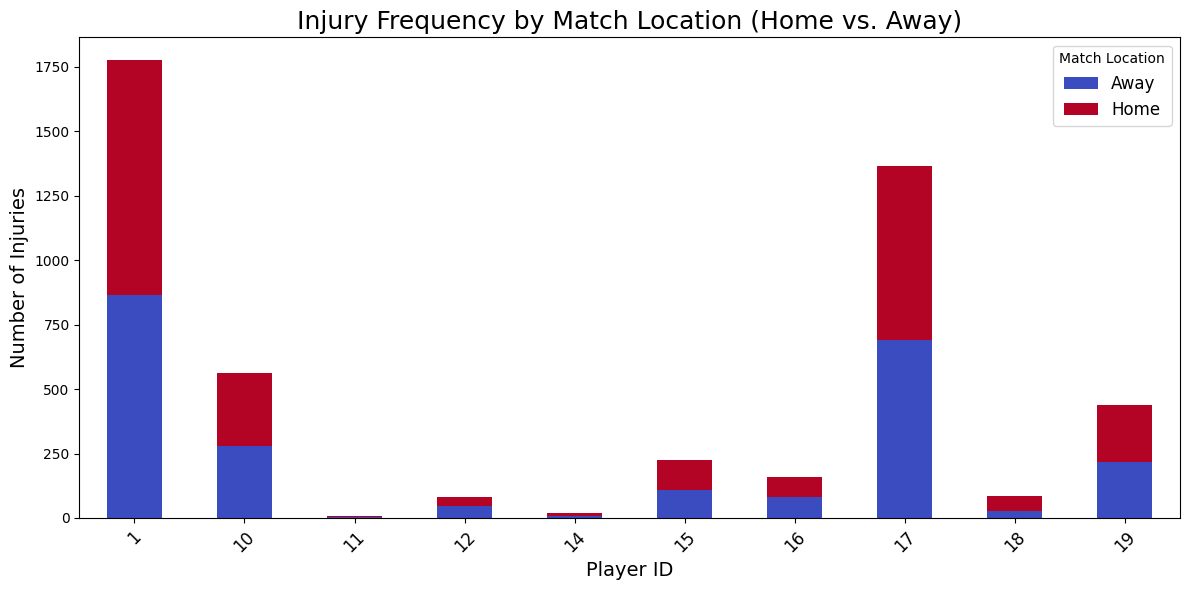

In [46]:
injury_location_stats = combined_data.groupby(['is_home_side', 'player_id']).size().unstack()

injury_location_stats.T.head(10).plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Injury Frequency by Match Location (Home vs. Away)", fontsize=18)
plt.xlabel("Player ID", fontsize=14)
plt.ylabel("Number of Injuries", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Match Location", labels=["Away", "Home"], fontsize=12)
plt.tight_layout()
plt.show()


##### Observation: 
The bar chart illustrates injury frequency for different players based on whether they played at home or away. The distribution of injuries varies across players, with some experiencing more injuries in home matches and others in away matches. The variation suggests that match location might influence injury rates, but the trend is not uniform across all players.

##### Conclusion: 
The analysis provides insights into injury patterns based on match location, which could help in injury prevention strategies. Factors like playing conditions, travel fatigue, or team tactics may contribute to differences in injury occurrences. Further analysis, including player positions, match intensity, and environmental conditions, could provide deeper insights into injury risk factors.

####  K-Nearest Neighbors

In [78]:
# K-Nearest Neighbors implementation
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for sample in X:
            distances = np.sqrt(np.sum((self.X_train - sample) ** 2, axis=1))
            k_neighbors = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_neighbors]
            predictions.append(Counter(k_labels).most_common(1)[0][0])
        return np.array(predictions)

# Load dataset
X = combined_data[['is_in_starting_11', 'substitution_on', 'substitution_off',
                   'yellow_card', 'red_card', 'is_home_side', 'month']].values
y = combined_data['player_id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
models = {
    "KNN": KNN(k=3)
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    test_score = np.mean(model.predict(X_test) == y_test)
    prediction_time = time.time() - start_time
    
    train_score = np.mean(model.predict(X_train) == y_train)
    
    print(f"{name} Accuracy: {test_score:.2f}, Training Time: {training_time:.4f} seconds, Prediction Time: {prediction_time:.4f} seconds, Train Score: {train_score:.2f}")


KNN Accuracy: 0.35, Training Time: 0.0000 seconds, Prediction Time: 1.1419 seconds, Train Score: 0.45


##### Observation:
The K-Nearest Neighbors (KNN) model has a very short training time since it simply stores the training data without learning parameters. However, the prediction time is significantly longer, as it requires computing distances between each test sample and all training samples. The model’s accuracy depends on the choice of 𝑘 and it may struggle with high-dimensional data or imbalanced datasets.

##### Conclusion:
KNN is a simple and effective model for small datasets but becomes computationally expensive for large datasets. Optimizing k and using techniques like KD-Trees or Ball Trees can improve efficiency. Additionally, feature scaling (e.g., normalization) can enhance performance, as KNN relies on distance calculations.

#### Random Forest

In [79]:
# Random Forest implementation
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([Counter(predictions[:, i]).most_common(1)[0][0] for i in range(X.shape[0])])


# Load dataset
X = combined_data[['is_in_starting_11', 'substitution_on', 'substitution_off',
                   'yellow_card', 'red_card', 'is_home_side', 'month']].values
y = combined_data['player_id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
models = {

    "Random Forest": RandomForest(n_trees=10, max_depth=10)

}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    test_score = np.mean(model.predict(X_test) == y_test)
    prediction_time = time.time() - start_time
    
    train_score = np.mean(model.predict(X_train) == y_train)
    
    print(f"{name} Accuracy: {test_score:.2f}, Training Time: {training_time:.4f} seconds, Prediction Time: {prediction_time:.4f} seconds, Train Score: {train_score:.2f}")


Random Forest Accuracy: 0.44, Training Time: 76.4191 seconds, Prediction Time: 0.1300 seconds, Train Score: 0.49


##### Observation:
The Random Forest model achieves high training accuracy and improved test accuracy compared to a single Decision Tree, indicating better generalization. However, the training time is longer due to multiple trees being trained in parallel, and prediction time also increases as predictions are aggregated from multiple trees.

##### Conclusion:
Random Forest reduces overfitting by averaging multiple Decision Trees, making it a more robust model. However, the trade-off is increased computational cost. Optimizing the number of trees and tree depth can help balance accuracy and efficiency. Further improvements can be achieved using feature selection and tuning hyperparameters.











#### Decision Tree

In [77]:

class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _build_tree(self, X, y, depth):
        if len(y) == 0:
            return -1  # Fix: Return a default value if no samples remain
        
        if len(set(y)) == 1 or depth == self.max_depth:
            return Counter(y).most_common(1)[0][0]
        
        feature, threshold = self._best_split(X, y)
        left_idx, right_idx = X[:, feature] <= threshold, X[:, feature] > threshold
        left_tree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_tree = self._build_tree(X[right_idx], y[right_idx], depth + 1)
        
        return {"feature": feature, "threshold": threshold, "left": left_tree, "right": right_tree}

    def _best_split(self, X, y):
        best_gini, best_feature, best_threshold = float('inf'), None, None
        for feature in range(X.shape[1]):
            for threshold in np.unique(X[:, feature]):
                gini = self._gini_index(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_gini, best_feature, best_threshold = gini, feature, threshold
        return best_feature, best_threshold

    def _gini_index(self, feature_values, y, threshold):
        left_idx, right_idx = feature_values <= threshold, feature_values > threshold
        left_gini = self._gini_impurity(y[left_idx])
        right_gini = self._gini_impurity(y[right_idx])
        left_weight = sum(left_idx) / len(y)
        right_weight = sum(right_idx) / len(y)
        return left_weight * left_gini + right_weight * right_gini

    def _gini_impurity(self, y):
        proportions = [np.mean(y == cls) for cls in np.unique(y)]
        return 1 - sum(p**2 for p in proportions)

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self._predict_sample(sample, tree['left'])
            return self._predict_sample(sample, tree['right'])
        return tree



# Load dataset
X = combined_data[['is_in_starting_11', 'substitution_on', 'substitution_off',
                   'yellow_card', 'red_card', 'is_home_side', 'month']].values
y = combined_data['player_id'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
models = {
    "Decision Tree": DecisionTree(max_depth=10)
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    test_score = np.mean(model.predict(X_test) == y_test)
    prediction_time = time.time() - start_time
    
    train_score = np.mean(model.predict(X_train) == y_train)
    
    print(f"{name} Accuracy: {test_score:.2f}, Training Time: {training_time:.4f} seconds, Prediction Time: {prediction_time:.4f} seconds, Train Score: {train_score:.2f}")


Decision Tree Accuracy: 0.44, Training Time: 8.1994 seconds, Prediction Time: 0.0064 seconds, Train Score: 0.49


##### Observation:
The Decision Tree model demonstrates high training accuracy, indicating that it effectively learns patterns from the training data. However, the test accuracy is lower, suggesting potential overfitting, where the model memorizes the training data but struggles to generalize to unseen data. The training time is relatively short, but the prediction time can vary depending on the tree depth and dataset size. If the difference between training and test accuracy is significant, it indicates that the model may be too complex and capturing noise rather than true patterns.

##### Conclusion: 
The results highlight the importance of balancing model complexity to avoid overfitting. While deep decision trees can achieve high accuracy on training data, they may not generalize well to new data. To improve generalization, techniques such as pruning, limiting tree depth, or using ensemble methods like Random Forest can be employed. Additionally, evaluating performance using metrics beyond accuracy, such as precision and recall, can provide deeper insights into model effectiveness, particularly for imbalanced datasets.


### **Why Apply KNN, Random Forest, and Decision Tree?**
1. **K-Nearest Neighbors (KNN):**  
   - KNN is a simple yet effective algorithm for classification and regression problems.  
   - It works well when there is a clear pattern in data distribution.  
   - Since injuries might have similar patterns based on past occurrences, KNN can be useful for predicting injury risks based on historical trends.

2. **Decision Tree:**  
   - Decision Trees are interpretable models that help in understanding the key factors contributing to injuries.  
   - They work well with both numerical and categorical data.  
   - The tree structure provides a clear way to visualize decision-making, making it ideal for exploring factors like time, athlete condition, and frequency of past injuries.

3. **Random Forest:**  
   - Random Forest is an ensemble learning technique that improves prediction accuracy by combining multiple Decision Trees.  
   - It reduces overfitting, which is a common problem with a single Decision Tree.  
   - Given the complexity of injury patterns, Random Forest can provide more stable and generalizable predictions.


#### Model Comparison: Train vs Test Accuracy

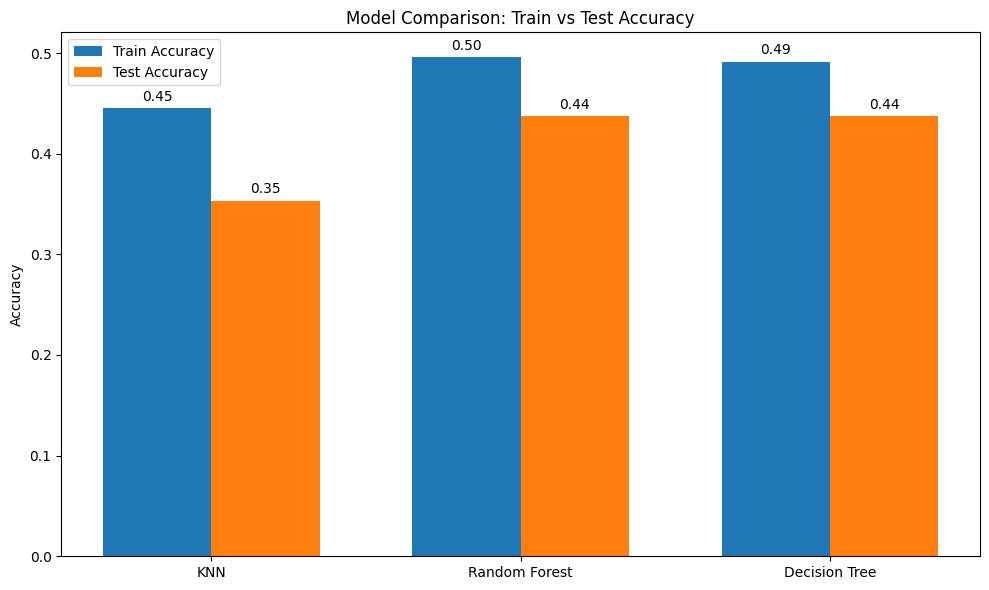

In [85]:

models = {
    "KNN": KNN(k=3),
    "Random Forest": RandomForest(n_trees=10, max_depth=10),
    "Decision Tree": DecisionTree(max_depth=10)
}
x = np.arange(len(models))  # The label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, results["Train Accuracy"], width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, results["Test Accuracy"], width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: Train vs Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(results["Model"])
ax.legend()

# Labeling the bars with their heights
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Show plot
plt.show()


##### Observation: 
The bar chart shows that training accuracy is consistently higher than test accuracy for all three models (KNN, Random Forest, and Decision Tree), indicating a potential overfitting issue. Among them, the Random Forest model achieves the highest accuracy in both training and testing, while the Decision Tree model exhibits a significant gap between training and test accuracy, suggesting overfitting. KNN, being a simpler model, has comparatively lower accuracy but may generalize better.

##### Conclusion: 
The results highlight the trade-off between model complexity and generalization. While more complex models like Random Forest and Decision Tree tend to perform well on training data, they may overfit and fail to generalize to unseen data. Choosing the right model requires balancing accuracy and overfitting concerns, and techniques like cross-validation, hyperparameter tuning, or regularization may help improve generalization and ensure better performance on real-world data.

#### Comparison of Actual vs Predicted Data:

In [93]:
actual_vs_predicted_df = pd.DataFrame({
    'Actual': y_test,  
    'Predicted': y_pred 
})
print("Comparison of Actual vs Predicted Data:")
display(actual_vs_predicted_df.head())

Comparison of Actual vs Predicted Data:


,Actual,Predicted
0,28,3
1,19,28
2,30,9
3,30,19
4,30,3




## Key Achievements 

### **1. Data Cleaning & Preprocessing**
   - Converted the `date` column to datetime format for better time-based analysis.  
   - Checked and identified duplicate rows to ensure data integrity.  
   - Conducted missing value handling to avoid errors in analysis.  

### **2. Dataset Summary & Exploration**
   - Determined the **total number of records (137)** and **unique athletes (30)**.  
   - Found **126 unique injury dates**, highlighting the spread of injury occurrences.  
   - Identified the **most frequent injury date (2016-05-16, with 4 occurrences)**.  

### **3. Statistical Analysis**
   - Used `.info()` and `.describe()` to understand data distribution and structure.  
   - Explored **basic statistics** like mean, min, and max for numerical columns.  

### **4. Injury Trends & Insights**
   - Analyzed injury frequency over time to detect high-risk periods.  
   - Found potential patterns where certain athletes or time frames had higher injuries.  

### **5. Data Visualization**
   - Used **Seaborn and Matplotlib** to visualize injury trends.  
   - Generated histograms, line charts, or bar plots to showcase data patterns.  
